/home/boundless/anaconda3/envs/aid-ranker/lib/python3.11/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceCla

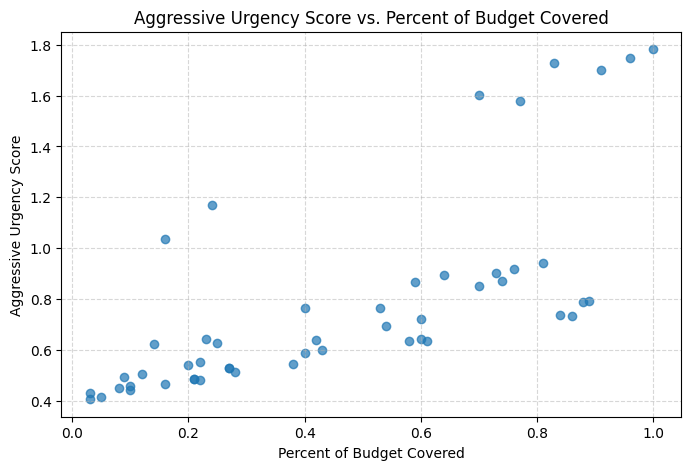

In [ ]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

clf = pipeline("zero-shot-classification", model="joeddav/xlm-roberta-large-xnli")

labels_urgency = ["High urgency", "Medium urgency", "Low urgency"]

base_descriptions = [
    "سقط سقف المدرسة الليلة الماضية وأصبح الأطفال بدون مأوى.",
    "نحتاج لأدوات مدرسية جديدة للعام الدراسي القادم.",
    "Our classroom lacks chairs and tables; please help.",
    "طلب مساعدات دراسية بسيط للقرطاسية والكتب.",
    "هناك حالة طارئة بعد الفيضانات، المدرسة غارقة بالمياه.",
    "The school library has no books for the new semester.",
    "نحتاج إلى دفاتر وأقلام للطلاب الفقراء.",
    "Our lab equipment is broken and we can't conduct experiments.",
    "نرجو مساعدتكم في توفير وسيلة نقل للطلاب.",
    "Help provide uniforms for students who can't afford them."
]

random.seed(42)
samples = [
    {
        "description": random.choice(base_descriptions),
        "percent_done": round(random.uniform(0, 1), 2)
    }
    for _ in range(50)
]

results = []
for item in samples:
    u = clf(item["description"], labels_urgency, multi_label=False)
    # Make urgency more aggressive: multiply confidence by (1 + percent_done)
    aggressive_score = u["scores"][0] * (1 + item["percent_done"])
    results.append({
        "description":            item["description"],
        "percent_done":           item["percent_done"],
        "urgency_label":          u["labels"][0],
        "urgency_score_model":    u["scores"][0],
        "urgency_score_aggressive": aggressive_score
    })

df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
plt.scatter(df["percent_done"], df["urgency_score_aggressive"], alpha=0.7)
plt.title("Aggressive Urgency Score vs. Percent of Budget Covered")
plt.xlabel("Percent of Budget Covered")
plt.ylabel("Aggressive Urgency Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


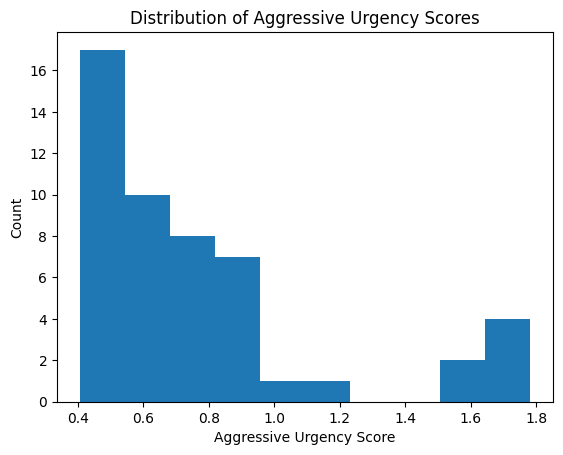

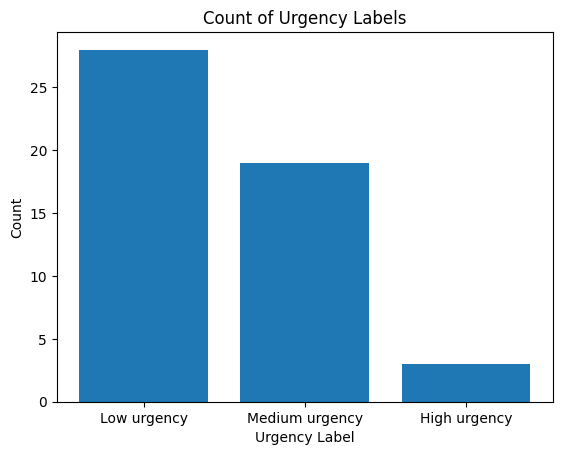

/tmp/ipykernel_915380/1653432483.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_label, labels=label_counts.index)


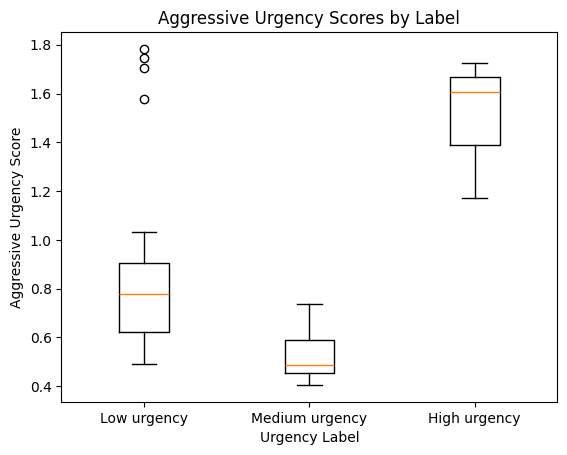

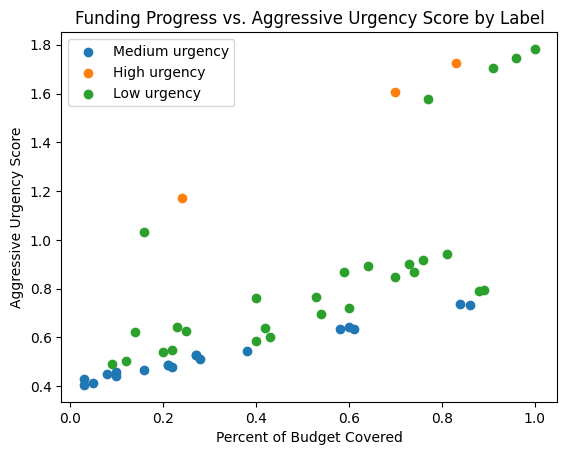

In [7]:
plt.figure()
plt.hist(df['urgency_score_aggressive'], bins=10)
plt.title('Distribution of Aggressive Urgency Scores')
plt.xlabel('Aggressive Urgency Score')
plt.ylabel('Count')
plt.show()

plt.figure()
label_counts = df['urgency_label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.title('Count of Urgency Labels')
plt.xlabel('Urgency Label')
plt.ylabel('Count')
plt.show()

plt.figure()
data_by_label = [df[df['urgency_label'] == label]['urgency_score_aggressive'] for label in label_counts.index]
plt.boxplot(data_by_label, labels=label_counts.index)
plt.title('Aggressive Urgency Scores by Label')
plt.xlabel('Urgency Label')
plt.ylabel('Aggressive Urgency Score')
plt.show()

plt.figure()
for label in df['urgency_label'].unique():
    subset = df[df['urgency_label'] == label]
    plt.scatter(subset['percent_done'], subset['urgency_score_aggressive'], label=label)
plt.title('Funding Progress vs. Aggressive Urgency Score by Label')
plt.xlabel('Percent of Budget Covered')
plt.ylabel('Aggressive Urgency Score')
plt.legend()
plt.show()